# Importing libraries

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [3]:
df=pd.read_csv(r'C:\Users\Kiran\Desktop\PredictXAI\stroke_data.csv')
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


# Exploratory Data Analysis

In [4]:
df.shape

(40910, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


# Handling Null Values

In [6]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df['sex'].value_counts()

sex
1.0    22710
0.0    18197
Name: count, dtype: int64

In [8]:
df['sex'].describe()

count    40907.000000
mean         0.555162
std          0.496954
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

In [9]:
mode = df['sex'].mode()[0]
#df['sex'].fillna(mode, inplace=True)
df.fillna({'sex':mode}, inplace=True)

In [10]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#minimum value column wise
df.min()

sex                   0.00
age                  -9.00
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level    55.12
bmi                  11.50
smoking_status        0.00
stroke                0.00
dtype: float64

In [12]:
print("BEFORE REMOVING NEGATIVE AGE : \n", df['age'].count())
negativeAge = df[df['age']<0]

print("\n\nNEGATIVE AGE VALUEsS : ")
print(negativeAge['age'].count())

df = df[df['age']>=0]
print("\n\nAFTER REMOVING NEGATIVE AGE :\n",df['age'].count())

BEFORE REMOVING NEGATIVE AGE : 
 40910


NEGATIVE AGE VALUEsS : 
58


AFTER REMOVING NEGATIVE AGE :
 40852


# Outllier Removal

In [13]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 4800x4800 with 0 Axes>

<Figure size 4800x4800 with 0 Axes>

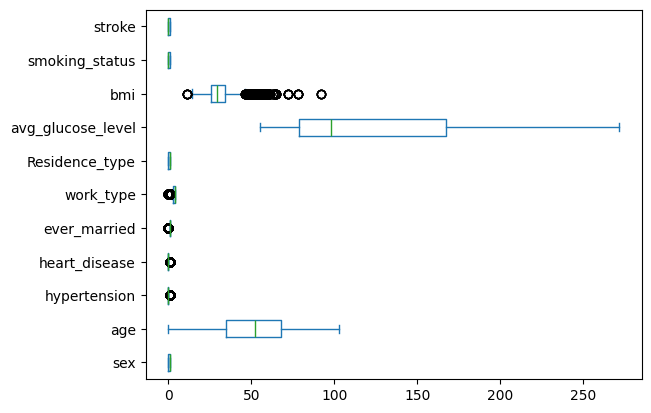

In [14]:
df.plot(kind='box', vert=False)
plt.show()

In [15]:
df['bmi'].describe()

count    40852.000000
mean        30.405662
std          6.835283
min         11.500000
25%         25.900000
50%         29.400000
75%         34.100000
max         92.000000
Name: bmi, dtype: float64

In [16]:
#removing the outlier using IQR method
Q1=25.9
Q3=34.1
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
median = df['bmi'].median()
df['bmi'] = df['bmi'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_21912\1182825875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['bmi'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)


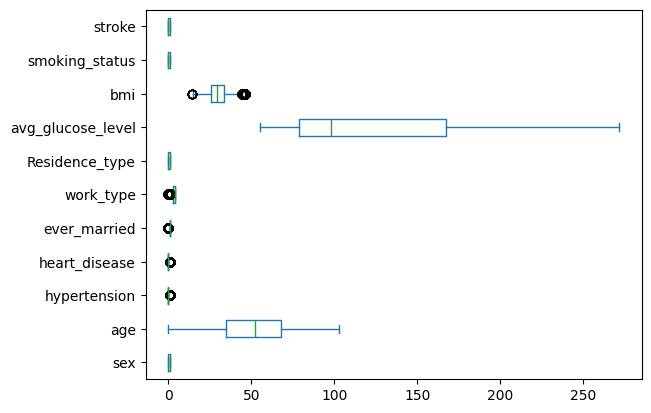

In [17]:
df.plot(kind='box', vert=False)
plt.show()

# Splitting the data for train and test

In [18]:
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [19]:
X=df.drop('stroke',axis=1)
X

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0


In [20]:
y=df['stroke']
y

0        1
1        1
2        1
3        1
4        1
        ..
40905    0
40906    0
40907    0
40908    0
40909    0
Name: stroke, Length: 40852, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [22]:
X_train

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
14697,0.0,76.0,0,1,1,3,1,252.72,30.5,1
35422,0.0,46.0,0,0,1,3,1,96.95,41.4,0
38274,1.0,45.0,0,0,1,4,1,84.70,34.0,0
11570,1.0,73.0,1,0,1,3,0,72.67,28.9,0
35172,1.0,29.0,1,0,1,4,1,94.20,34.4,1
...,...,...,...,...,...,...,...,...,...,...
40117,1.0,25.0,1,0,1,4,1,206.40,29.4,0
28075,1.0,81.0,0,0,1,3,0,128.72,26.3,1
29257,0.0,15.0,0,0,0,4,1,93.60,28.5,1
40119,1.0,22.0,0,0,0,4,1,72.02,34.0,1


In [23]:
Y_train

14697    1
35422    0
38274    0
11570    1
35172    0
        ..
40117    0
28075    0
29257    0
40119    0
17731    1
Name: stroke, Length: 32681, dtype: int64

In [24]:
X_test

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3645,1.0,81.0,0,0,1,3,1,116.10,27.1,0
28003,0.0,56.0,0,0,1,3,1,135.19,36.0,1
32057,1.0,42.0,0,0,1,2,1,127.20,22.7,0
10657,1.0,25.0,0,0,1,2,1,64.17,41.5,0
23155,0.0,28.0,0,0,1,4,1,101.46,25.9,1
...,...,...,...,...,...,...,...,...,...,...
32693,1.0,76.0,0,0,0,2,0,70.66,27.2,0
18773,0.0,77.0,0,0,0,3,1,82.28,24.0,1
13926,0.0,9.0,0,0,1,4,0,97.92,26.9,1
13709,1.0,75.0,0,0,1,3,0,118.03,35.5,1


In [25]:
Y_test

3645     1
28003    0
32057    0
10657    1
23155    0
        ..
32693    0
18773    1
13926    1
13709    1
10980    1
Name: stroke, Length: 8171, dtype: int64

# Normalization

In [26]:
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40852.00000,40852.000000,40852.000000,40852.000000,40852.000000,40852.000000,40852.000000,40852.000000,40852.000000,40852.000000,40852.000000
mean,0.55493,51.404019,0.213576,0.127680,0.821306,3.460981,0.514810,122.067180,29.898240,0.488740,0.499413
std,0.49698,21.542970,0.409836,0.333738,0.383100,0.781052,0.499787,57.554737,5.917197,0.499879,0.500006
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.100000,0.000000,0.000000
25%,0.00000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.747500,25.900000,0.000000,0.000000
50%,1.00000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,0.000000
75%,1.00000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.410000,33.300000,1.000000,1.000000
max,1.00000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,46.300000,1.000000,1.000000


In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [28]:
#scaling the data so that comparatively larger values do not make the model biased
X_train_scaled=std.fit_transform(X_train)
X_test_scaled=std.transform(X_test)

# TRAINING

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [31]:
dt.feature_importances_

array([1.44237385e-04, 9.40174653e-06, 4.34091468e-02, 2.68708104e-02,
       3.91050183e-02, 7.45114406e-02, 2.76191569e-02, 4.49507062e-01,
       3.02036992e-01, 3.67867336e-02])

In [32]:
Y_pred=dt.predict(X_test_scaled)
Y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
#Train the model with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
import joblib
import os
model_path=os.path.join('C:/Users/Kiran/Desktop/PredictXAI/','dt.sav')
joblib.dump(dt,model_path)

['C:/Users/Kiran/Desktop/PredictXAI/dt.sav']

# Model Evaluation

In [36]:
# 1. Accuracy
ac_dt=accuracy_score(Y_test,Y_pred)
print(ac_dt)
print(f'Accuracy: {ac_dt * 100:.2f}%')

1.0
Accuracy: 100.00%


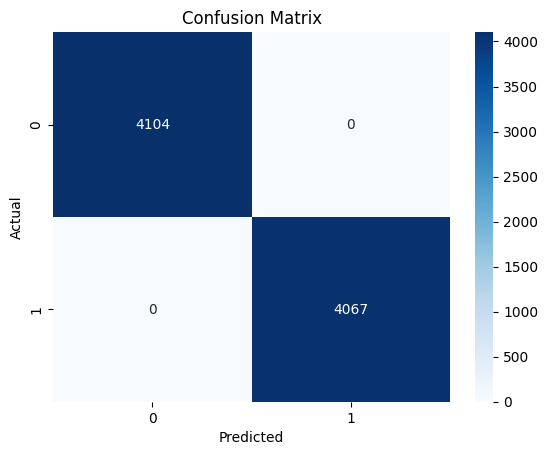

In [37]:
#2. Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, Y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Classification Report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4104
           1       1.00      1.00      1.00      4067

    accuracy                           1.00      8171
   macro avg       1.00      1.00      1.00      8171
weighted avg       1.00      1.00      1.00      8171



In [ ]:
# 3. Feature importance in making decision

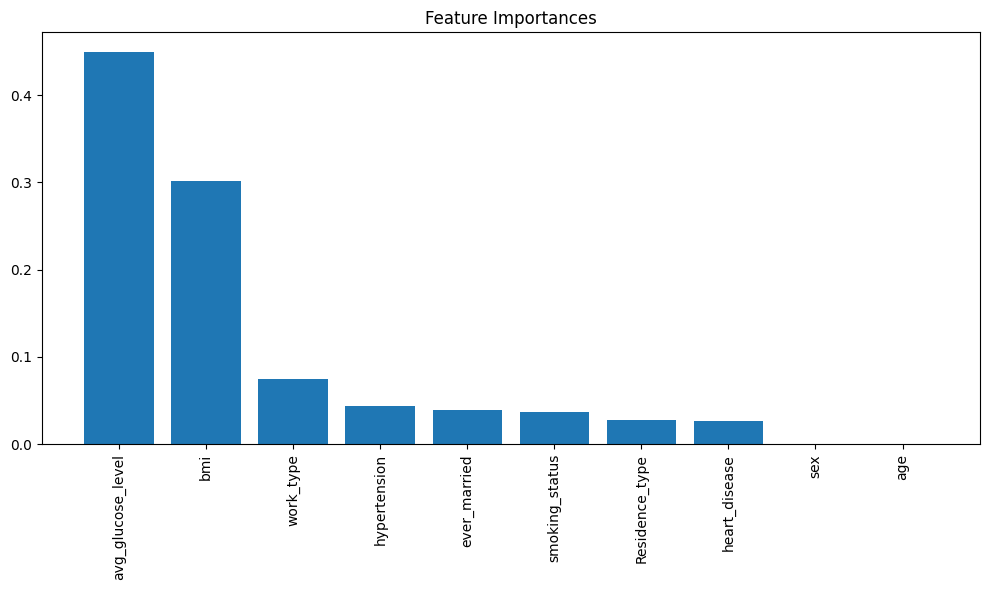

In [43]:

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

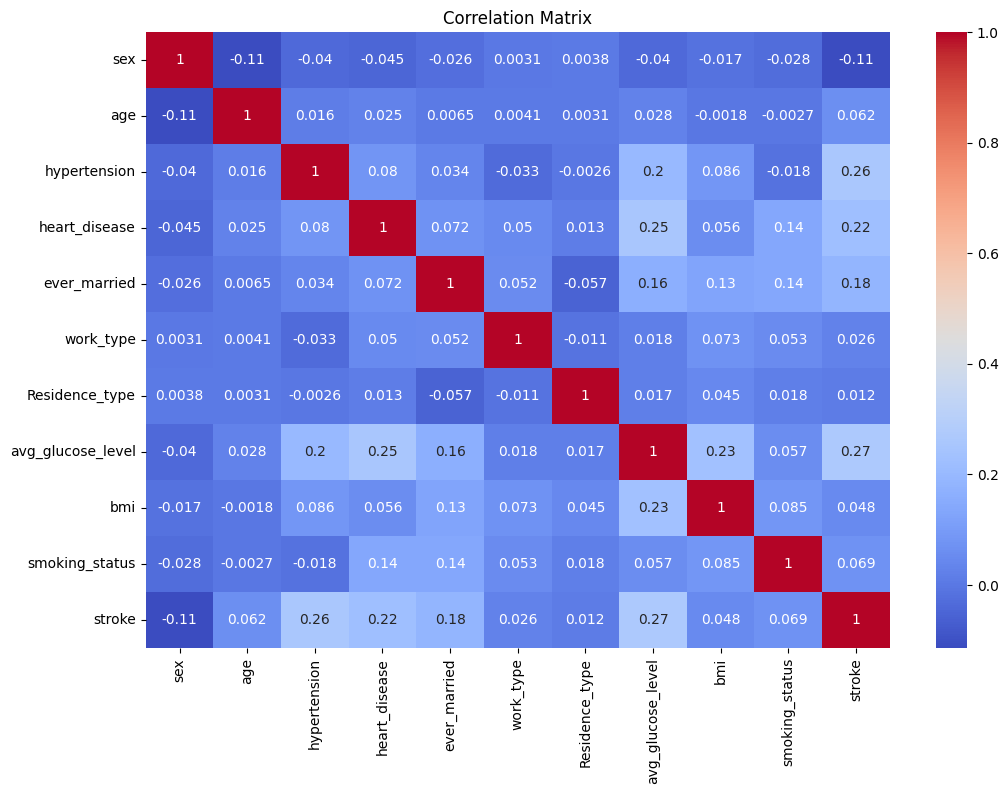

In [44]:
# 4. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()